In [ ]:
# чем больше элементов в курсе, тем чаще пользователь просматривает теорию на этом курсе

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import pytz
import matplotlib as mpl
import calendar
import statistics

In [64]:
# открываем файл "element.csv"
elements_of_course = pd.read_csv('C://Users//37529//Desktop//data since//2th sem//element.csv', quotechar="'", 
                                 delim_whitespace=True)
# сотируем id курсов по возрастанию
elements_of_course = elements_of_course.sort_values(by='id')
# список всех курсов в таблице 'elements'
elements_courseid=list(elements_of_course.id.unique())
# для удобства переименуем колонки 
elements_of_course.rename(columns={'id':'courseid', 'Colvo':'number of elements'}, inplace=True)
elements_of_course

,courseid,number of elements
259,4,40
24,5,51
78,7,100
376,8,42
173,9,38
...,...,...
215,5484,31
171,5489,1
123,5580,46
216,5594,30


In [65]:
# загрузка  "журнала событий" с записями действий только студентов дистанционной формы обучения
d_parser = lambda x: pd.to_datetime(x, unit='s')
logstore = pd.read_csv('C://Users//37529//Desktop//data since//2th sem//DO(2022-2023).csv', quotechar="'", 
                       delim_whitespace=True,parse_dates=['timecreated'], date_parser=d_parser, 
                       usecols=[ "userid","courseid","action", "objecttable", "timecreated"])
# Преобразование времени
logstore['timecreated'] = logstore['timecreated'] + pd.Timedelta(hours=3)
# сортируем по нужным курсам (по списку курсов в таблице 'elements')
logstore=logstore.query("courseid in @elements_courseid")
# выбираем промежуток времни
logstore=logstore.loc[(logstore['timecreated']>='2022-09-01')&(logstore['timecreated']<'2023-01-31')]
# Далее нам нужно выделить теоритические действия. Делаю выборку по ['viewed', 'reviewed', 'shown']
action = ['viewed', 'reviewed', 'shown']
logstore_theory = logstore[logstore["action"].isin(action)]
# выбираем теоритические элементы
elements = ['lesson', 'book', 'lesson_pages', 'page', 'folder','forum_discussions','resource','bigbluebuttonbn','book_chapters']
logstore_theory = logstore[logstore["objecttable"].isin(elements)]
# удаляем ненужные колонки
logstore_theory=logstore_theory.drop(columns = ['objecttable','timecreated', 'userid','action'], axis = 1) 
# подсчет количеста просмотра теории каждым студентом на каждом курсе
logstore_theory_1=logstore_theory.groupby (logstore_theory.columns.tolist (), as_index= False ). size ()
# сортируем по 'courseid' и переименываваем колонку
logstore_theory_1 = logstore_theory_1.sort_values(by='courseid')
logstore_theory_1.rename(columns={'size':'viewing theory'}, inplace=True)
logstore_theory_1

,courseid,viewing theory
0,5,800
1,7,1665
2,8,8
3,9,771
4,14,5432
...,...,...
348,5458,732
349,5459,4
350,5483,107
351,5489,17


In [66]:
# сортировка "elements_of_course" по курсам из "logstore_theory_1"
theory_courseid=list(logstore_theory_1.courseid.unique())
elements_of_course=elements_of_course.query("courseid in @theory_courseid")
# Соединение 2 таблиц
df_merged = pd.merge(logstore_theory_1, elements_of_course,left_on='courseid',right_on='courseid')
df_merged

,courseid,viewing theory,number of elements
0,5,800,51
1,7,1665,100
2,8,8,42
3,9,771,38
4,14,5432,180
...,...,...,...
348,5458,732,24
349,5459,4,3
350,5483,107,44
351,5489,17,1


In [67]:
# удаление анамалий
df_merged = df_merged.sort_values(by='viewing theory')
df_merged = df_merged.loc[~df_merged['viewing theory'].isin([0,1,2,3,4, 38275, 27698,6361,5715])]
df_merged = df_merged.loc[~df_merged['number of elements'].isin([1,2,81,76,116])]


df_merged

,courseid,viewing theory,number of elements
257,405,5,17
55,87,5,29
298,4102,5,30
241,363,6,19
174,259,6,10
...,...,...,...
293,4097,4449,20
30,56,4451,133
44,71,4561,45
4,14,5432,180


In [81]:
df_merged = df_merged.sort_values(by='viewing theory')
df_merged.head(50)

,courseid,viewing theory,number of elements
298,4102,5,30
257,405,5,17
55,87,5,29
241,363,6,19
174,259,6,10
263,423,6,5
248,372,6,15
240,362,6,5
194,286,6,40
345,5196,6,24


In [69]:
# подсчет коэффциента корреляции данных из таблицы "df_merged"
correlation= df_merged['viewing theory'].corr(df_merged['number of elements'])
correlation

0.5142975065354382

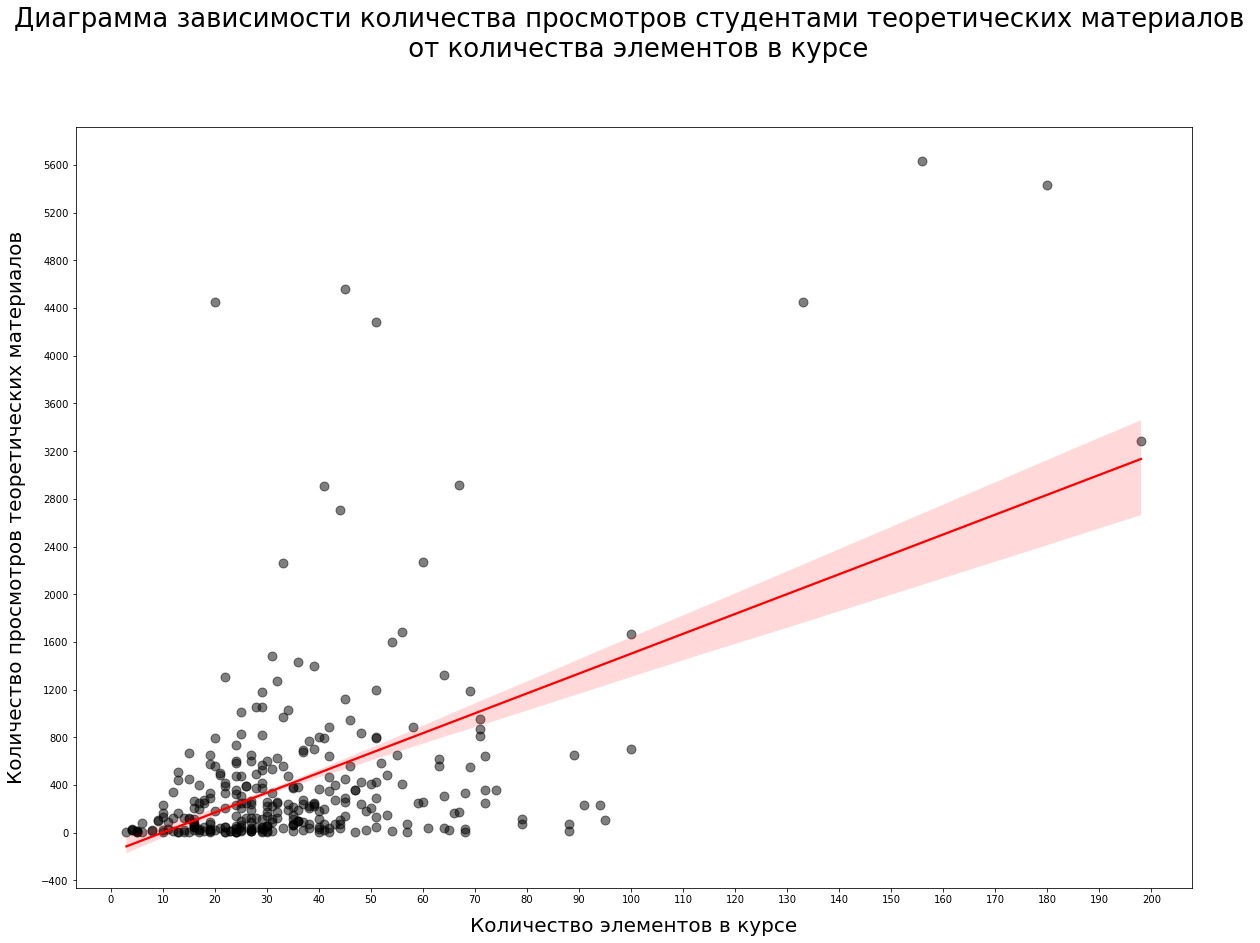

In [79]:
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
plt.figure(figsize=(20, 14))
sns.regplot(x =df_merged["number of elements"], y =df_merged["viewing theory"], 
            scatter_kws = {"color": "black", "alpha": 0.5, "s": 80},
            line_kws = {"color": "red"},
            ci = 50)
plt.gcf().axes[0].yaxis.set_major_locator(ticker.MultipleLocator(400))
plt.gcf().axes[0].xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.title('Диаграмма зависимости количества просмотров студентами теоретических материалов \n от количества элементов в курсе', 
          size=26, pad = 70)
plt.xlabel('Количество элементов в курсе',size=20, labelpad=12)
plt.ylabel('Количество просмотров теоретических материалов',size=20, labelpad=15) 
plt.savefig('Диаграмма рассеяния.pdf')